In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
import hvplot.pandas
import plotly.express as px
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

In [2]:
#Import Csv
file_path= "Customer_Churn_database.csv"
customer_churn_df=pd.read_csv(file_path)
customer_churn_small=customer_churn_df.sample(100000)
customer_churn_small.shape

(100000, 22)

# Data preprocessing 

In [3]:
#Investigate all the elements within each feature

for columns in customer_churn_small:
        unique_values=np.unique(customer_churn_small[columns])
        nr_values=len(unique_values)
        if nr_values<=10:
            print("The number of values per feature {} is -- {}.".format(columns, nr_values,unique_values))
        else:
            print("The number of values for feature {} is:{}".format(columns, nr_values))

The number of values for feature city is:21
The number of values per feature gender is -- 2.
The number of values for feature age is:128
The number of values per feature registered_via is -- 5.
The number of values for feature registered_on is:4704
The number of values for feature date_streamed is:31
The number of values for feature less_than_25 is:195
The number of values for feature less_than_50 is:87
The number of values for feature less_than_75 is:52
The number of values for feature less_than_985 is:78
The number of values for feature above_985 is:417
The number of values for feature unique_songs is:314
The number of values for feature total_secs is:93869
The number of values for feature payment_method_id is:32
The number of values for feature payment_plan_days is:27
The number of values for feature plan_list_price is:36
The number of values for feature actual_amount_paid is:36
The number of values per feature auto_renewed is -- 2.
The number of values for feature transaction_date 

In [4]:
#Remove ages below 15 and higher than 80
min_age=15
max_age=80
column='age'

customer_churn_small=customer_churn_small[customer_churn_small[column].between(min_age,max_age)]
customer_churn_small

,city,gender,age,registered_via,registered_on,date_streamed,less_than_25,less_than_50,less_than_75,less_than_985,...,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,auto_renewed,transaction_date,membership_expire_date,cancelled,is_churn
1480733,13,male,27,7,20101129,20170310,3,1,1,0,...,5291.41,41,30,129,129,1,20170320,20170420,0,0
6954217,13,male,41,9,20040710,20170316,4,0,0,0,...,16260.50,40,30,149,149,1,20170324,20170424,0,0
2669885,5,male,34,3,20121108,20170319,0,0,0,0,...,559.00,32,90,298,298,0,20170319,20170617,0,1
2254998,4,male,32,3,20120502,20170314,0,0,1,1,...,36335.00,39,30,149,149,1,20170331,20170526,0,0
5393191,15,male,31,7,20110113,20170321,3,1,0,1,...,1200.87,41,30,129,129,1,20170312,20170413,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149797,6,male,22,4,20160227,20170305,0,0,0,0,...,19781.80,39,30,149,149,1,20170228,20170430,0,0
4371742,6,male,22,4,20160504,20170323,2,4,6,2,...,6362.90,38,30,149,149,0,20170329,20170428,0,0
8139435,13,female,58,9,20070627,20170328,0,0,0,0,...,3589.75,40,30,149,149,1,20170310,20170412,0,0
5098447,10,female,20,9,20110629,20170328,2,0,0,1,...,3454.64,38,90,477,477,0,20170314,20170612,0,1


In [5]:
#Create bins of ages 
bins=[15,20,29,39,49,59,69,80]
labels=['age_15_19','age_20_29','age_30_39','age_40_49','age_50_59','age_60_69','age_70_80']
customer_churn_small['Age_group']=pd.cut(customer_churn_small['age'],bins=bins, labels=labels, right=False)
customer_churn_small

#Drop the age column
customer_churn_small=customer_churn_small.drop(columns=['age'])
customer_churn_small

,city,gender,registered_via,registered_on,date_streamed,less_than_25,less_than_50,less_than_75,less_than_985,above_985,...,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,auto_renewed,transaction_date,membership_expire_date,cancelled,is_churn,Age_group
1480733,13,male,7,20101129,20170310,3,1,1,0,22,...,41,30,129,129,1,20170320,20170420,0,0,age_20_29
6954217,13,male,9,20040710,20170316,4,0,0,0,70,...,40,30,149,149,1,20170324,20170424,0,0,age_40_49
2669885,5,male,3,20121108,20170319,0,0,0,0,2,...,32,90,298,298,0,20170319,20170617,0,1,age_30_39
2254998,4,male,3,20120502,20170314,0,0,1,1,157,...,39,30,149,149,1,20170331,20170526,0,0,age_30_39
5393191,15,male,7,20110113,20170321,3,1,0,1,4,...,41,30,129,129,1,20170312,20170413,0,0,age_30_39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149797,6,male,4,20160227,20170305,0,0,0,0,76,...,39,30,149,149,1,20170228,20170430,0,0,age_20_29
4371742,6,male,4,20160504,20170323,2,4,6,2,17,...,38,30,149,149,0,20170329,20170428,0,0,age_20_29
8139435,13,female,9,20070627,20170328,0,0,0,0,14,...,40,30,149,149,1,20170310,20170412,0,0,age_50_59
5098447,10,female,9,20110629,20170328,2,0,0,1,14,...,38,90,477,477,0,20170314,20170612,0,1,age_20_29


In [6]:
# Use get_dummies() to convert categorical variables.
customer_churn_dummies= pd.get_dummies(customer_churn_small,columns=["city","gender","registered_via", "payment_plan_days", "plan_list_price", "payment_method_id", "registered_via","Age_group"])
customer_churn_dummies

,registered_on,date_streamed,less_than_25,less_than_50,less_than_75,less_than_985,above_985,unique_songs,total_secs,actual_amount_paid,...,registered_via_7,registered_via_9,registered_via_13,Age_group_age_15_19,Age_group_age_20_29,Age_group_age_30_39,Age_group_age_40_49,Age_group_age_50_59,Age_group_age_60_69,Age_group_age_70_80
1480733,20101129,20170310,3,1,1,0,22,27,5291.41,129,...,1,0,0,0,1,0,0,0,0,0
6954217,20040710,20170316,4,0,0,0,70,32,16260.50,149,...,0,1,0,0,0,0,1,0,0,0
2669885,20121108,20170319,0,0,0,0,2,2,559.00,298,...,0,0,0,0,0,1,0,0,0,0
2254998,20120502,20170314,0,0,1,1,157,114,36335.00,149,...,0,0,0,0,0,1,0,0,0,0
5393191,20110113,20170321,3,1,0,1,4,9,1200.87,129,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149797,20160227,20170305,0,0,0,0,76,2,19781.80,149,...,0,0,0,0,1,0,0,0,0,0
4371742,20160504,20170323,2,4,6,2,17,25,6362.90,149,...,0,0,0,0,1,0,0,0,0,0
8139435,20070627,20170328,0,0,0,0,14,14,3589.75,149,...,0,1,0,0,0,0,0,1,0,0
5098447,20110629,20170328,2,0,0,1,14,10,3454.64,477,...,0,1,0,0,1,0,0,0,0,0


In [7]:
customer_churn_dummies.shape

(96852, 149)

# Feature selection

In [8]:
#Split the data into X & y
X=customer_churn_dummies.drop('is_churn', axis=1).values
y=customer_churn_dummies['is_churn']

print (X.shape)
print (y.shape)

(96852, 148)
(96852,)


In [9]:
#Run radom Forest Clssifier
df=RandomForestClassifier(random_state=15,criterion="entropy", max_depth=10)
df.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=15)

In [10]:
#Running feature importance 
fi_col=[]
fi=[]
for i, column in enumerate(customer_churn_dummies.drop(columns = ['is_churn'])):
    print("The feature importance for {} is : {}".format(column,df.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(df.feature_importances_[i])

The feature importance for registered_on is : 0.0115035957993895
The feature importance for date_streamed is : 0.0018630507772998868
The feature importance for less_than_25 is : 0.0019249983932589346
The feature importance for less_than_50 is : 0.0015282278732575499
The feature importance for less_than_75 is : 0.0013043536330539281
The feature importance for less_than_985 is : 0.0012063086962613415
The feature importance for above_985 is : 0.002376708327747568
The feature importance for unique_songs is : 0.002543423761804724
The feature importance for total_secs is : 0.0028481549073925755
The feature importance for actual_amount_paid is : 0.11627267274412734
The feature importance for auto_renewed is : 0.07221328681961547
The feature importance for transaction_date is : 0.13918555940523744
The feature importance for membership_expire_date is : 0.1776594040712076
The feature importance for cancelled is : 0.026090689900038013
The feature importance for city_1 is : 0.00030045115077564715


The feature importance for payment_method_id_36 is : 0.003875651329665133
The feature importance for payment_method_id_37 is : 0.0033747519471425506
The feature importance for payment_method_id_38 is : 0.014592391026365916
The feature importance for payment_method_id_39 is : 0.003531856438108042
The feature importance for payment_method_id_40 is : 0.0011510804319517826
The feature importance for payment_method_id_41 is : 0.01296101654171781
The feature importance for registered_via_3 is : 0.0010595710552013175
The feature importance for registered_via_4 is : 0.0007571755618081492
The feature importance for registered_via_7 is : 0.0037821086804764362
The feature importance for registered_via_9 is : 0.001875165475467359
The feature importance for registered_via_13 is : 1.3297557651060948e-05
The feature importance for Age_group_age_15_19 is : 0.0009224514695962757
The feature importance for Age_group_age_20_29 is : 0.0009718864142021427
The feature importance for Age_group_age_30_39 is :

In [11]:
#Create a dataframe with feature importance
fi_df=zip(fi_col, fi)
fi_df=pd.DataFrame(fi_df,columns=["Feature", "Feature Importance"])
fi_df=fi_df.sort_values('Feature Importance', ascending=False).reset_index()
fi_df
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(fi_df)

     index                 Feature  Feature Importance
0       12  membership_expire_date        1.776594e-01
1       11        transaction_date        1.391856e-01
2       48    payment_plan_days_30        1.386444e-01
3        9      actual_amount_paid        1.162727e-01
4       10            auto_renewed        7.221329e-02
5       78     plan_list_price_149        3.790667e-02
6      126    payment_method_id_32        2.885256e-02
7       13               cancelled        2.609069e-02
8       65   payment_plan_days_410        2.129481e-02
9       68       plan_list_price_0        1.933107e-02
10     132    payment_method_id_38        1.459239e-02
11     102    plan_list_price_1788        1.438190e-02
12      39        registered_via_7        1.331394e-02
13     135    payment_method_id_41        1.296102e-02
14      57   payment_plan_days_195        1.268731e-02
15       0           registered_on        1.150360e-02
16      56   payment_plan_days_180        1.050689e-02
17      52

In [12]:
#Creating column to keep 
columns_to_keep=fi_df['Feature'][0:135]
columns_to_keep

0      membership_expire_date
1            transaction_date
2        payment_plan_days_30
3          actual_amount_paid
4                auto_renewed
                ...          
130      payment_method_id_11
131       payment_plan_days_3
132      payment_method_id_10
133      plan_list_price_2000
134      plan_list_price_1399
Name: Feature, Length: 135, dtype: object

# Logistic regression

In [13]:
customer_churn_dummies.shape
customer_churn_dummies[columns_to_keep].shape

(96852, 145)

In [14]:
#Split data into X & Y
X=customer_churn_dummies[columns_to_keep]
y=customer_churn_dummies['is_churn']

#Standardize the data with MinMaxScaler()
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler=scaler.fit_transform(X)
X = pd.DataFrame(scaler)
X.columns = features

#Create Train & dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=15)

# Improve model
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9,test_size=0.1, random_state=15)

In [15]:
#Training model
log_reg=LogisticRegression(random_state=10,solver='lbfgs', max_iter=1000000)
log_reg.fit(X_train, y_train)

#Predic result of model
y_predict=log_reg.predict(X_train)

#Predict probability
pred_proba=log_reg.predict_proba(X_train)

#coef_ Coefficient 
log_reg.coef_

array([[-2.39351562e-01, -1.34823278e+00, -3.70497872e+00,
        -3.35783631e+00, -8.59139335e-01, -1.88332171e+00,
         3.23434078e-01,  2.44984535e+00,  1.04851348e+00,
        -1.77816883e-01,  8.67830792e-01,  2.02882488e+00,
         2.53071918e-02,  2.53071918e-02, -5.90434798e-02,
         8.72521684e-01, -8.57175060e-01,  1.48378464e+00,
         1.91311904e-01,  7.08438277e-01, -1.03751153e+00,
         1.70253406e+00,  1.65783953e+00, -5.67993264e-01,
         1.32538935e+00, -2.31812858e-01,  2.53071918e-02,
         2.53071918e-02, -2.16793667e+00,  4.53873372e-01,
        -8.49053105e-01, -3.84380857e-01, -1.59982491e-01,
        -2.98666759e-02, -2.98666759e-02,  1.58149206e-01,
        -1.06136868e-01,  1.23804983e+00, -7.29158488e-01,
        -9.04982768e-01, -6.74191938e-01, -2.98666759e-02,
        -2.98666759e-02, -6.28777309e-02,  1.32388278e+00,
         4.44742928e-01,  1.00366414e+00, -3.40954611e-01,
        -6.65446101e-01, -1.01086648e+00,  4.11631056e-0

The Training Accuracy is: 0.92727872425859
The Test Accuracy is: 0.9295854628052242
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     61824
           1       0.92      0.39      0.55      7908

    accuracy                           0.93     69732
   macro avg       0.92      0.69      0.76     69732
weighted avg       0.93      0.93      0.91     69732



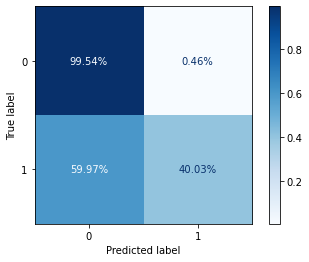

In [16]:
#Evaluating the Model 
# Acurracy of the model on Train data
print("The Training Accuracy is:", log_reg.score(X_train, y_train))

#Accuracy of the model on Test data 
print("The Test Accuracy is:", log_reg.score(X_test, y_test))

#Classification Report 
print(classification_report(y_train, y_predict))

#Confussion matrix  
plot_confusion_matrix(log_reg, X_test, y_test,cmap="Blues",normalize="true",values_format=".2%")

AxesSubplot(0.125,0.125;0.775x0.755)


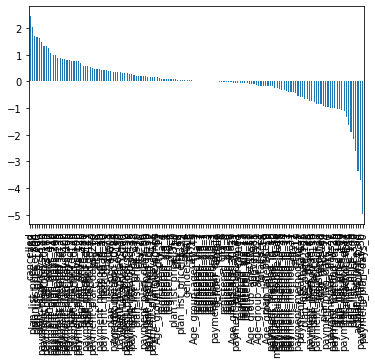

In [17]:
# Understand the weights of all the variables
weights = pd.Series(log_reg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False).plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


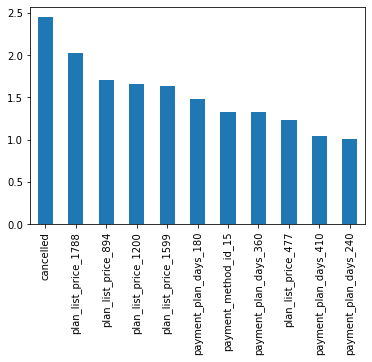

In [18]:
#Positive realtions of weight ( Increasing the probability of Churn)
weights = pd.Series(log_reg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:11].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


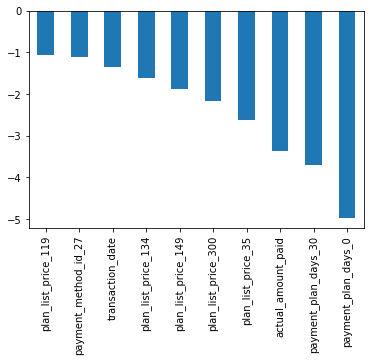

In [19]:
#Positive realtions of weight ( Increasing the probability of Churn)
weights = pd.Series(log_reg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [20]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

cm = confusion_matrix(y_train, y_predict)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.99555189 0.39352554]
The Precision is: [0.92771121 0.9188072 ]
The False positive rate is: [0.60647446 0.00444811]
The False Negative Rate is:  [0.00444811 0.60647446]

The average TPR is: 0.6945387164935579
The average Precision is: 0.9232592052935307
The average False positive rate is: 0.3054612835064421
The average False Negative Rate is: 0.3054612835064421


In [21]:
#Logarithmic loss or Log loss
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))



The Log Loss on Training is:  0.23336118617555482
The Log Loss on Testing Dataset is:  0.2253966732766693


# Random Forest

In [22]:
#Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =15, max_features = "auto",
                                  max_leaf_nodes = 30, criterion='entropy', max_depth=10)
model_rf.fit(X_train, y_train)


#Predic result of model
y_predict=model_rf.predict(X_train)

#Predict probability
pred_proba=model_rf.predict_proba(X_train)


The Training Accuracy is: 0.9317501290655653
The Test Accuracy is: 0.9338685113961952
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     17133
           1       0.96      0.43      0.59      2237

    accuracy                           0.93     19370
   macro avg       0.94      0.71      0.78     19370
weighted avg       0.93      0.93      0.92     19370



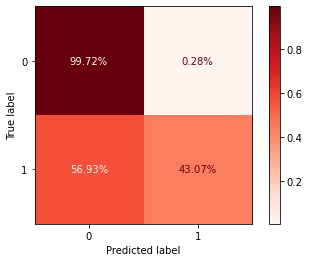

In [23]:
#Evaluating the Model 
# Acurracy of the model on Train data
print("The Training Accuracy is:", model_rf.score(X_train, y_train))

#Accuracy of the model on Test data 
print("The Test Accuracy is:", model_rf.score(X_test, y_test))

#Classification Report 
print(classification_report(y_train, y_predict))

#Confussion Matrix
plot_confusion_matrix(model_rf, X_test, y_test,cmap="Reds",normalize="true",values_format=".2%")

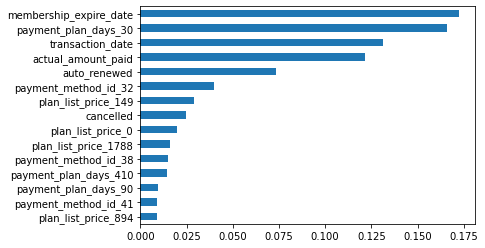

In [24]:
#Feature importance that increase the probability of Churn
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh')

## The radom forest model results provide different values of importance for churn customers. The principal features to predict when customers will churn is membership expire date, payment_plan_days_30 and transaction_date. Does 3 fetures are closely correlated with each other.

In [25]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

cm = confusion_matrix(y_train, y_predict)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.99760696 0.42735807]
The Precision is: [0.93027813 0.95887663]
The False positive rate is: [0.57264193 0.00239304]
The False Negative Rate is:  [0.00239304 0.57264193]

The average TPR is: 0.7124825130879998
The average Precision is: 0.9445773776999643
The average False positive rate is: 0.2875174869120002
The average False Negative Rate is: 0.2875174869120002


In [26]:
#Logarithmic loss or Log loss
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.18152983923539964
The Log Loss on Testing Dataset is:  0.22874537122227606


# Compare both models

Text(0.5, 1.0, 'Random Forest')

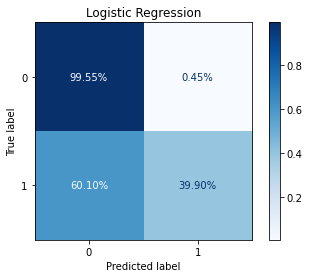

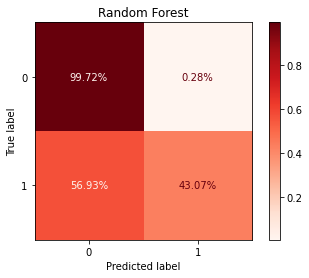

In [27]:
#Confussion matrix  
plot_confusion_matrix(log_reg, X_test, y_test,cmap="Blues",normalize="true",values_format=".2%")
# Add title and axis names
plt.title('Logistic Regression')

plot_confusion_matrix(model_rf, X_test, y_test,cmap="Reds",normalize="true",values_format=".2%") 
# Add title and axis names
plt.title('Random Forest')



AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'value of Importance')

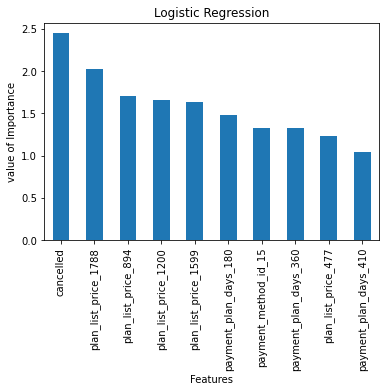

In [28]:
#Feature importance for Logistic Regression
weights = pd.Series(log_reg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))
# Add title and axis names
plt.title('Logistic Regression')
plt.xlabel('Features')
plt.ylabel('value of Importance')

Text(0, 0.5, 'Features')

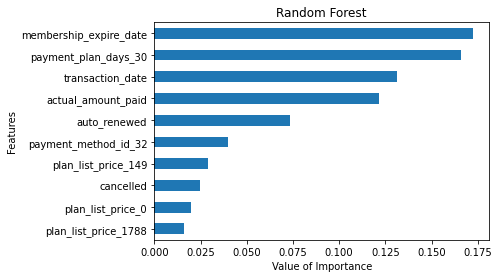

In [29]:
#Feature importance of Random Forest 
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

# Add title and axis names
plt.title('Random Forest')
plt.xlabel('Value of Importance')
plt.ylabel('Features')

# K-Means

In [30]:
#Calculating best K values 
inertia = []
k = list(range(1, 11))

# Looking for the best K
for i in k:
    km = KMeans(n_clusters=i, random_state=15)
    km=km.fit(X)
    u=km.inertia_
    inertia.append(u)
    print("The innertia for :", i, "Clusters is:", u)

The innertia for : 1 Clusters is: 620109.7613867334
The innertia for : 2 Clusters is: 475629.41362360236
The innertia for : 3 Clusters is: 385570.2274544454
The innertia for : 4 Clusters is: 345581.2626659226
The innertia for : 5 Clusters is: 320744.8154067807
The innertia for : 6 Clusters is: 309836.3441288694
The innertia for : 7 Clusters is: 298369.6953315192
The innertia for : 8 Clusters is: 289164.7239025953
The innertia for : 9 Clusters is: 280289.5553246878
The innertia for : 10 Clusters is: 272192.0969235092


In [31]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [32]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=15)

# Fit the model
model.fit(X)

#Model labels
model.labels_

# Predict clusters
predictions = model.predict(X)

# Create return DataFrame with predicted clusters
df_y = pd.DataFrame(predictions, columns=['Cluster'])
combined = customer_churn_dummies.join(df_y, how='inner')
combined.head()

,registered_on,date_streamed,less_than_25,less_than_50,less_than_75,less_than_985,above_985,unique_songs,total_secs,actual_amount_paid,...,registered_via_9,registered_via_13,Age_group_age_15_19,Age_group_age_20_29,Age_group_age_30_39,Age_group_age_40_49,Age_group_age_50_59,Age_group_age_60_69,Age_group_age_70_80,Cluster
35147,20140818,20170305,5,3,0,1,21,27,5411.24,129,...,0,0,0,1,0,0,0,0,0,2
26668,20070422,20170323,0,0,0,1,7,8,2116.94,149,...,1,0,0,0,1,0,0,0,0,0
78153,20080307,20170309,11,6,2,3,47,54,14383.30,149,...,1,0,0,1,0,0,0,0,0,0
53152,20120322,20170304,3,0,0,0,0,2,34.43,149,...,0,0,0,0,0,1,0,0,0,3
93791,20060723,20170307,0,1,0,1,23,24,5817.44,149,...,1,0,0,1,0,0,0,0,0,0


In [33]:
#Calculating the count of customers per cluster 
predictions=model.predict(X_train)
unique,counts=np.unique(predictions, return_counts=True)
counts=counts.reshape(1,4)

#Creation a dataframe with customer count
countscldf=pd.DataFrame(counts,columns=["Cluster 0","Cluster 1","Cluster 2","Cluster 3"])
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,3833,1276,9909,4352


Explained variance ratio (first two components): [0.23880428 0.15403676]


<Figure size 432x288 with 0 Axes>

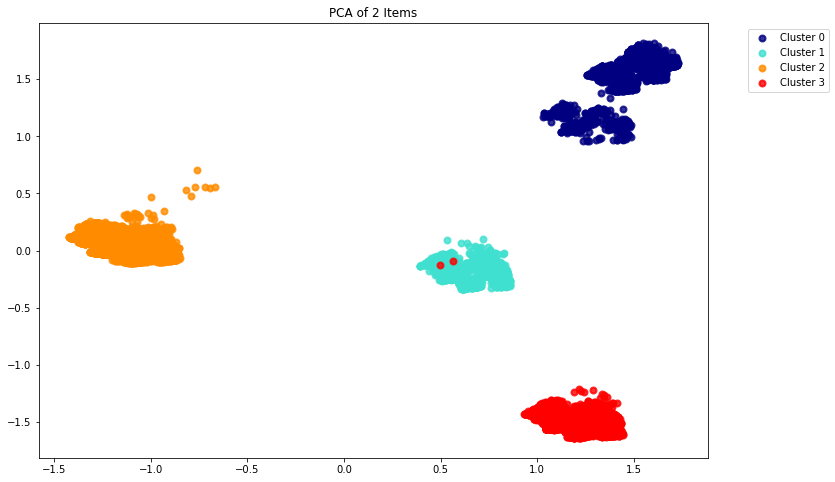

In [34]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"]

pca = PCA(n_components=2, random_state = 15)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Total Variance in our dataset is:  6.409213792664894
The 95% variance we want to have is:  6.088753103031649

Variance explain with 30 n_compononets:  6.039661805486955
Variance explain with 35 n_compononets:  6.143276838153611
Variance explain with 40 n_compononets:  6.226360967867808
Variance explain with 41 n_compononets:  6.239745783923519


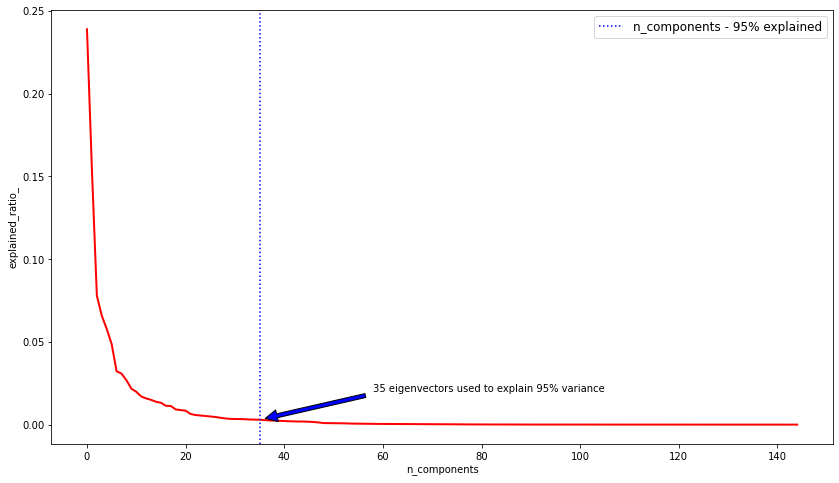

In [35]:
#Identify the Best number of components 
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 15)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))


# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(35,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('35 eigenvectors used to explain 95% variance', xy=(35, pca.explained_variance_ratio_[35]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 1 Clusters is: 118987.88288408166
The innertia for : 2 Clusters is: 90036.79624253257
The innertia for : 3 Clusters is: 71980.71233035703
The innertia for : 4 Clusters is: 64052.62255147434
The innertia for : 5 Clusters is: 59082.18600035248
The innertia for : 6 Clusters is: 56654.62072665378
The innertia for : 7 Clusters is: 54356.30027459238
The innertia for : 8 Clusters is: 52908.20426124352
The innertia for : 9 Clusters is: 50880.99051015623
The innertia for : 10 Clusters is: 49670.80352567679


Text(0.5, 1.0, 'Inertia Plot per k')

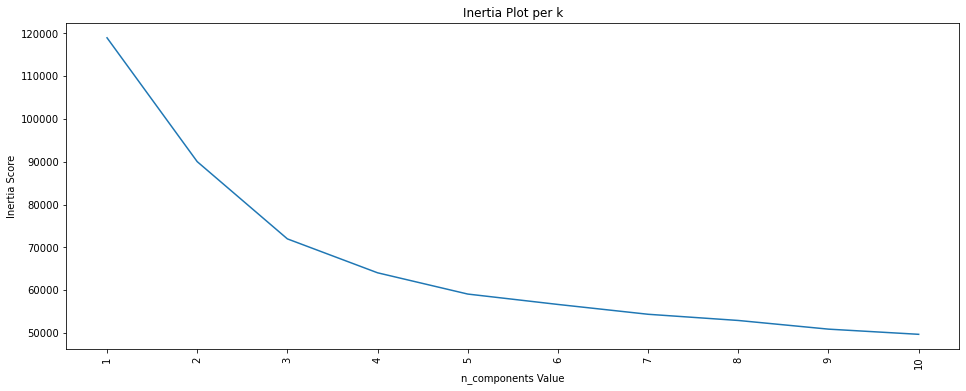

In [36]:
# Running PCA again

pca = PCA(n_components=35, random_state = 15)
X_r = pca.fit(X).transform(X)

inertia = []

#Creating the elbow curve with new optimized data

for f in k:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)


# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(k))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(k, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

## After runnin PCA we were able to imporve the results by reducin inertia. 

Explained variance ratio (first two components): [0.23880428 0.15403676]


<Figure size 432x288 with 0 Axes>

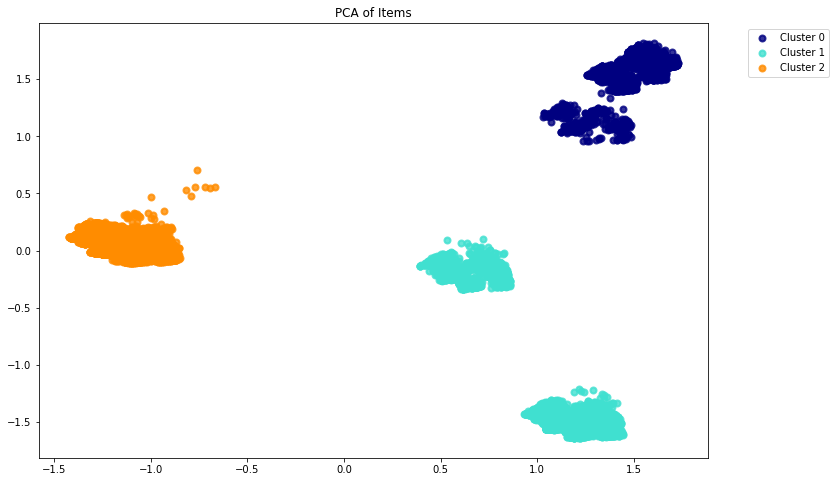

In [37]:
# Running K means on 3 clusters

kmeans = KMeans(n_clusters=3, random_state=15)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=2, random_state = 15)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

In [38]:
#Running PCA with 35 PC
pca = PCA(n_components=35, random_state = 15)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 3 Ks
kmeans = KMeans(n_clusters=3, random_state=15)
kmeans = kmeans.fit(X_r)

# Predict clusters
predictions = kmeans.predict(X_r)

clusters = kmeans.labels_
clusters.shape

# Create return DataFrame with predicted clusters
df_y = pd.DataFrame(predictions, columns=['Cluster'])
combined_final = customer_churn_small.join(df_y, how='inner')
combined_final.head()

,city,gender,registered_via,registered_on,date_streamed,less_than_25,less_than_50,less_than_75,less_than_985,above_985,...,payment_plan_days,plan_list_price,actual_amount_paid,auto_renewed,transaction_date,membership_expire_date,cancelled,is_churn,Age_group,Cluster
18170,22,male,3,20130108,20170319,1,1,1,0,17,...,30,149,149,1,20170331,20170511,0,0,age_30_39,2
1915,13,female,9,20110611,20170320,2,1,1,1,144,...,30,149,149,1,20170228,20170422,0,0,age_30_39,1
8453,22,male,3,20140506,20170323,4,1,2,1,73,...,30,180,180,1,20170323,20170422,0,0,age_30_39,1
14472,15,female,9,20080512,20170330,45,3,1,2,41,...,30,149,149,1,20170331,20170517,0,0,age_30_39,0
6869,18,male,3,20140121,20170315,4,1,1,1,17,...,30,180,180,1,20170322,20170421,0,0,age_20_29,2


In [39]:
#Export dataframe with combined 
combined_final.to_csv("final_kmeans.csv",index=False)